In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 1: Linearity
The relationship between predictors (X) and the response (Y) should be linear in the parameters

How to check it? We look at residuals (Y - $\hat{Y}$) vs fitted values ($\hat{Y}$)

If linearity holds → residuals scatter randomly around 0, no pattern.

EXAMPLE of LINEARITY
* → residuals scatter randomly around 0, no pattern.

In [ ]:
# Generate some synthetic data
np.random.seed(42)
n = 100
X1 = np.linspace(0, 10, n)
#X2 = X1 * 0.8 + np.random.normal(0, 1, n)  # correlated with X1 (for multicollinearity example)
y = 3 + 2*X1 + np.random.normal(0, 2, n)   # linear with noise

# Put in dataframe
df = pd.DataFrame({"X1": X1, "y": y})

In [ ]:
# Fit linear regression model
X = sm.add_constant(df[["X1"]])
model = sm.OLS(df["y"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     1051.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           3.48e-54
Time:                        15:06:24   Log-Likelihood:                -200.97
No. Observations:                 100   AIC:                             405.9
Df Residuals:                      98   BIC:                             411.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6544      0.362      7.332      0.0

In [ ]:
#Get the predicted Y hat and the residuals
df["y_pred"] = model.predict(X)
df["residuals"] = df["y"] - df["y_pred"]
print(df)

          X1          y     y_pred  residuals
0    0.00000   3.993428   2.654374   1.339054
1    0.10101   2.925492   2.859181   0.066311
2    0.20202   4.699417   3.063988   1.635430
3    0.30303   6.652120   3.268794   3.383326
4    0.40404   3.339774   3.473601  -0.133827
..       ...        ...        ...        ...
95   9.59596  19.264889  22.111013  -2.846123
96   9.69697  22.986180  22.315819   0.670360
97   9.79798  23.118070  22.520626   0.597444
98   9.89899  22.808207  22.725433   0.082774
99  10.00000  22.530826  22.930240  -0.399414

[100 rows x 4 columns]


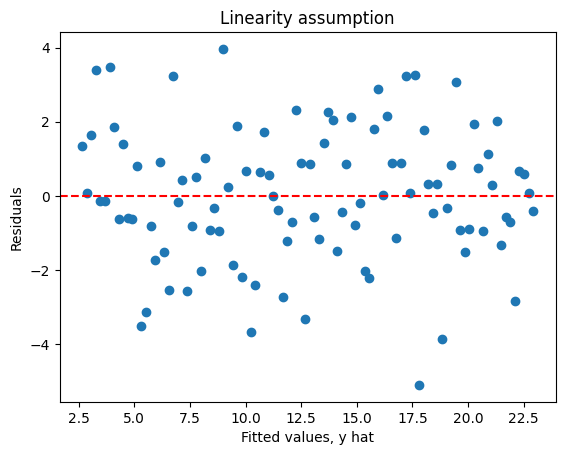

In [ ]:
plt.scatter(df["y_pred"], df["residuals"])
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values, y hat")
plt.ylabel("Residuals")
plt.title("Linearity assumption")
plt.show()

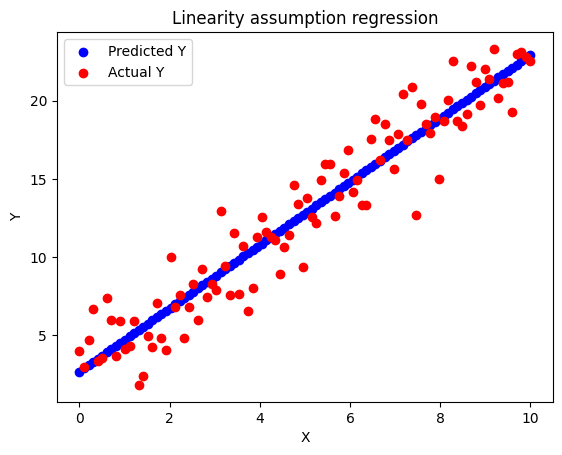

In [ ]:
plt.scatter(df["X1"], df["y_pred"], color='blue', label='Predicted Y')
plt.scatter(df["X1"], df["y"], color='red', label='Actual Y')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linearity assumption regression")
plt.show()

EXAMPLE of Non-LINEARITY
* → residuals show a curve, wave, or systematic shape.


In [ ]:
# Generate some synthetic non linear data
np.random.seed(0)
n = 100
X1 = np.linspace(0,10,n)
y_nonlin = 3 + 2*X1**2 + np.random.normal(0,5,100)
df2 = pd.DataFrame({"X1": X1, "y_nonlin": y_nonlin})

In [ ]:
# Fit linear regression model
X = sm.add_constant(df2[["X1"]])
model = sm.OLS(df2["y_nonlin"], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               y_nonlin   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     1038.
Date:                Sun, 04 Jan 2026   Prob (F-statistic):           6.04e-54
Time:                        15:06:36   Log-Likelihood:                -429.73
No. Observations:                 100   AIC:                             863.5
Df Residuals:                      98   BIC:                             868.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -28.9543      3.566     -8.119      0.0

In [ ]:
#Get the predicted Y hat and the residuals
df2["y_pred"] = model.predict(X)
df2["residuals"] = df2["y_nonlin"] - df2["y_pred"]
print(df2)

          X1    y_nonlin      y_pred  residuals
0    0.00000   11.820262  -28.954276  40.774537
1    0.10101    5.021192  -26.949090  31.970282
2    0.20202    7.975314  -24.943905  32.919219
3    0.30303   14.388121  -22.938719  37.326840
4    0.40404   12.664287  -20.933534  33.597821
..       ...         ...         ...        ...
95   9.59596  190.697747  161.538348  29.159399
96   9.69697  191.114943  163.543533  27.571409
97   9.79798  203.930169  165.548719  38.381450
98   9.89899  199.614563  167.553904  32.060658
99  10.00000  205.009947  169.559090  35.450857

[100 rows x 4 columns]


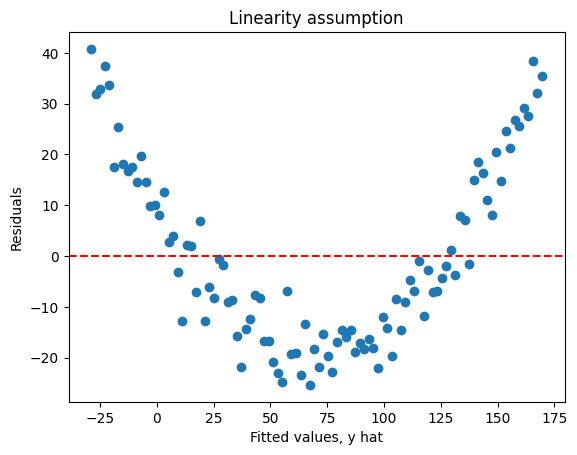

In [ ]:
plt.scatter(df2["y_pred"], df2["residuals"])
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values, y hat")
plt.ylabel("Residuals")
plt.title("Linearity assumption")
plt.show()

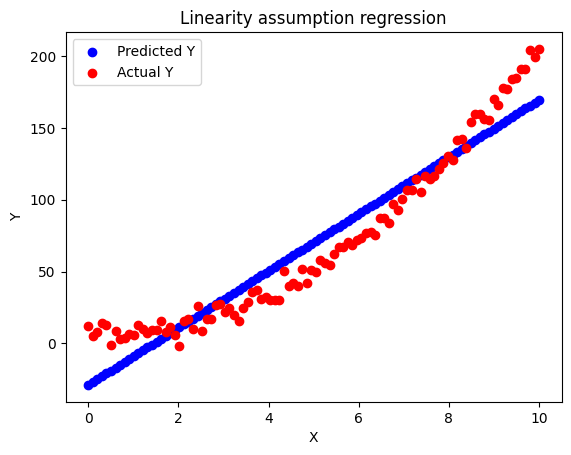

In [ ]:
plt.scatter(df2["X1"], df2["y_pred"], color='blue', label='Predicted Y')
plt.scatter(df2["X1"], df2["y_nonlin"], color='red', label='Actual Y')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linearity assumption regression")
plt.show()

# 2: Independence of Erros
The residuals should be independent from each other, meaning the errors are independent random variables

EXAMPLE of INDEPENDENT
* → looks like random scatter.


In [ ]:
# Generate some synthetic independent data.
np.random.seed(1)
n = 100
X = np.linspace(0,10,n)
y = 2*X + np.random.normal(0,1,n)

In [ ]:
#Fit a model
X_mat = sm.add_constant(X)
model = sm.OLS(y, X_mat).fit()
residuals = model.resid

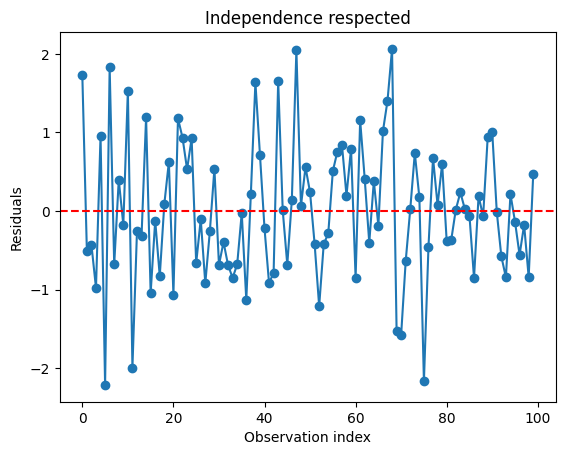

In [ ]:
plt.plot(residuals, marker='o')
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Observation index")
plt.ylabel("Residuals")
plt.title("Independence respected")
plt.show()

EXAMPLE of DEPENDENT
*   → you see patterns, e.g., waves, trends.

In [ ]:
# Generate some synthetic Dependent data.
np.random.seed(1)
n = 100
X = np.linspace(0,10,n)

eps = np.zeros(n) #To generate Dependent Errors
for i in range(1, n):
    eps[i] = 0.8 * eps[i-1] + np.random.normal(0, 1) #dependent of the previous epsilon, AKA AR(1)

y = 2*X + eps

In [ ]:
#Fit a model
X_mat = sm.add_constant(X)
model = sm.OLS(y, X_mat).fit()
residuals = model.resid

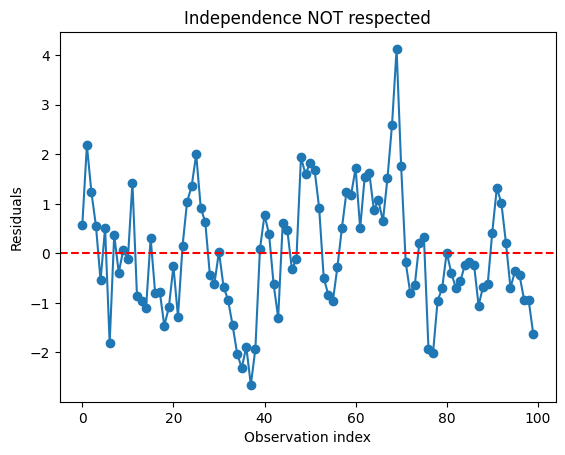

In [ ]:
plt.plot(residuals, marker='o')
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Observation index")
plt.ylabel("Residuals")
plt.title("Independence NOT respected")
plt.show()

# 3: Zero conditional mean (exogeneity)
Residuals are always uncorrelated with the variables you include in the regression.
Omitted relevant variables (correlated with Y) still cause bias, but the residuals will only be correlated with the omitted variable, not the included ones.

IN PRACTICE:
After accounting for all the X variables in the model, there should be nothing left in the error that is correlated with X.

IF VIOLATED: The Residuals when plotted against a feature, they will have a pattern instead of being randomly surrounding 0.

* TIP: It is possible to create do a dependent error by leaving out a X2 dependent on X1 from the model

In [ ]:
np.random.seed(42)
n = 150

# Relevant feature
X1 = np.random.normal(0, 1, n)
# Another relevant feature correlated with X1
X2 = X1 + np.random.normal(0, 0.5, n)
# Irrelevant feature (not affecting y)
X3 = np.random.normal(0, 1, n)

# True y depends only on X1 and X2
y = 4*X1 + 5*X2 + np.random.normal(0, 1, n)

df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})

EXAMPLES OF VIOLATED

 → X1 and X2 influence Y but one got excluded from the LR model

Correlation with X1: 1.0012333687975359e-15
Correlation with omitted X2: 0.4494539398693925
Correlation with omitted X3: 0.021103667207031326


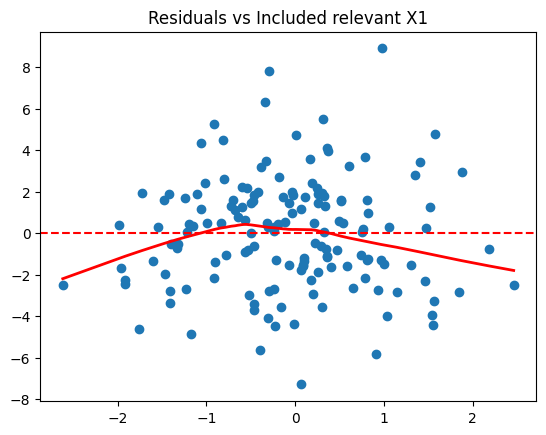

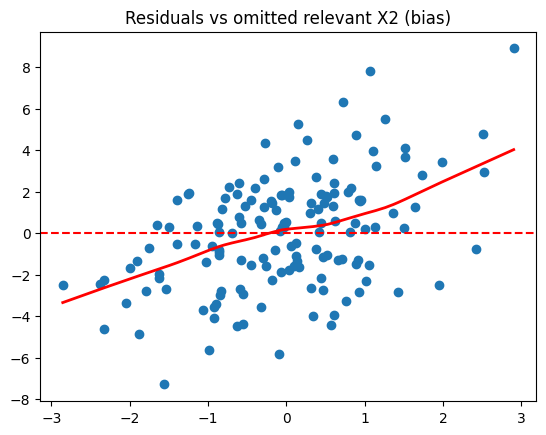

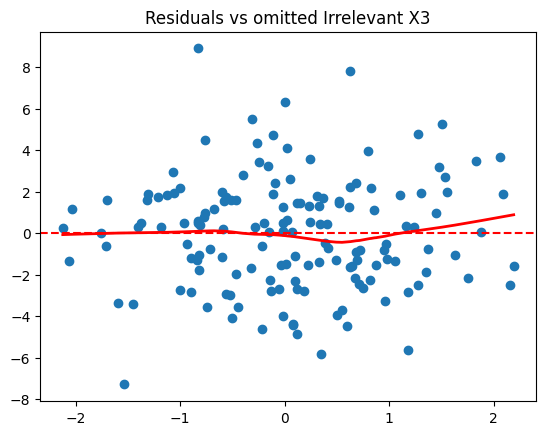

Text(0, 0.5, 'y_hat')

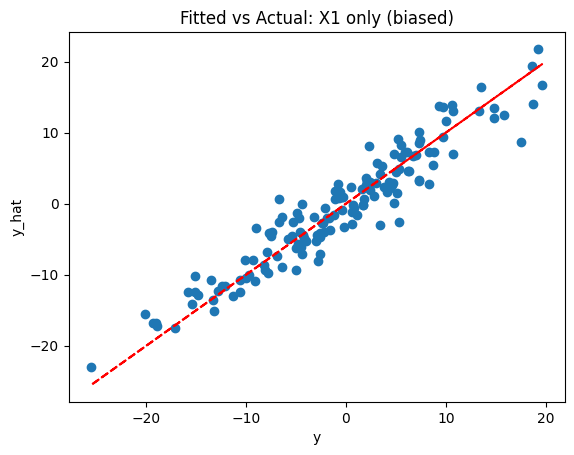

In [ ]:
# Model 1: X1 only -We missed relevant feature X1
X1_const = sm.add_constant(df[["X1"]])
model1 = sm.OLS(y, X1_const).fit()
res1 = y - model1.predict(X1_const)
yhat1 = model1.predict(X1_const)

# Residuals vs X1 (will show ~0 correlation)
print("Correlation with X1:", np.corrcoef(X1, res1)[0,1])
# Residuals vs X2 (shows the problem)
print("Correlation with omitted X2:", np.corrcoef(X2, res1)[0,1])
# Residuals vs X3 (shows the problem)
print("Correlation with omitted X3:", np.corrcoef(X3, res1)[0,1])

plt.scatter(X1, res1)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res1, X1)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X1")
plt.show()

plt.scatter(X2, res1) #Shows a patter, the clearer the pattern the bigger the correlation
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res1, X2)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs omitted relevant X2 (bias)")
plt.show()

plt.scatter(X3, res1)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res1, X3)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs omitted Irrelevant X3")
plt.show()

plt.scatter(y, yhat1)
plt.plot(y, y, color="red", linestyle="--")
plt.title("Fitted vs Actual: X1 only (biased)")
plt.xlabel("y"); plt.ylabel("y_hat")

Correlation with X1: 0.4239427224140443
Correlation with omitted X2: 1.2263124749000797e-15
Correlation with omitted X3: -0.06174875436702277


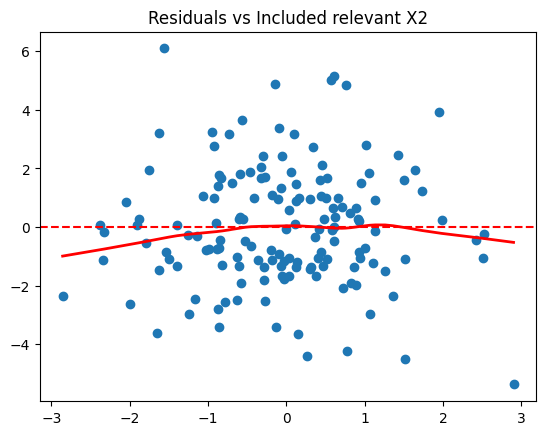

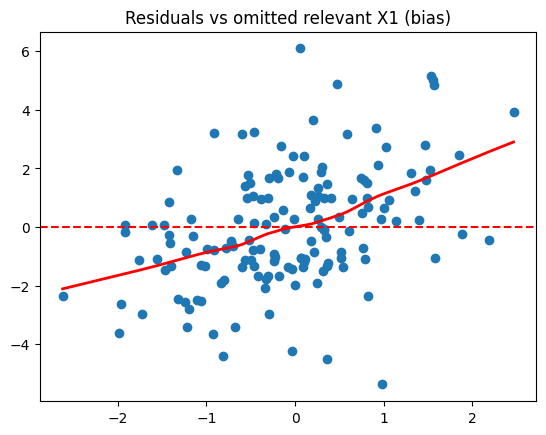

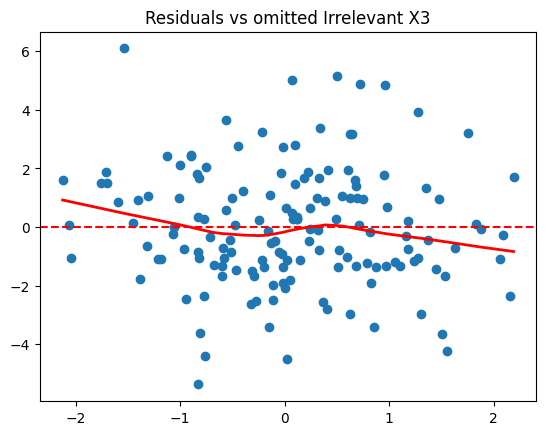

Text(0, 0.5, 'y_hat')

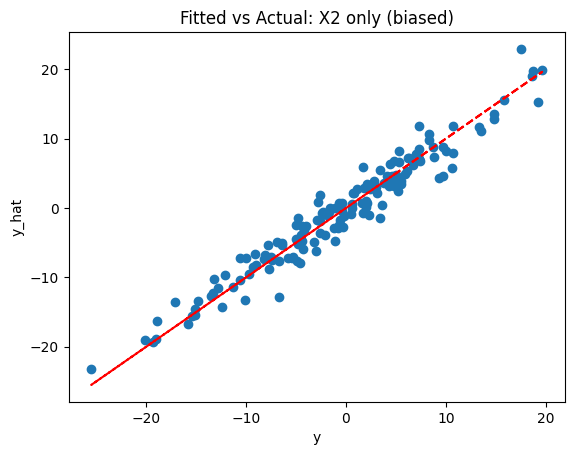

In [ ]:
# Model 2: X2 only - We missed relevant feature X2
X2_const = sm.add_constant(df[["X2"]])
model2 = sm.OLS(y, X2_const).fit()
res2 = y - model2.predict(X2_const)
yhat2 = model2.predict(X2_const)

# Residuals vs X1 (will show ~0 correlation)
print("Correlation with X1:", np.corrcoef(X1, res2)[0,1])
# Residuals vs X2 (shows the problem)
print("Correlation with omitted X2:", np.corrcoef(X2, res2)[0,1])
# Residuals vs X3 (shows the problem)
print("Correlation with omitted X3:", np.corrcoef(X3, res2)[0,1])

plt.scatter(X2, res2)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res2, X2)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X2")
plt.show()

plt.scatter(X1, res2)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res2, X1)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs omitted relevant X1 (bias)")
plt.show()

plt.scatter(X3, res2)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res2, X3)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs omitted Irrelevant X3")
plt.show()

plt.scatter(y, yhat2)
plt.plot(y, y, color="red", linestyle="--")
plt.title("Fitted vs Actual: X2 only (biased)")
plt.xlabel("y"); plt.ylabel("y_hat")

EXAMPLES OF VIOLATED

 → X1 and X2 influence Y and both got included in the LR model. X3 is not influencing and its inclusion or exclusion does not matter.

Correlation with X1: 1.7172642104057935e-15
Correlation with omitted X2: 1.587279686997249e-15
Correlation with omitted X3: -0.03829283376809727


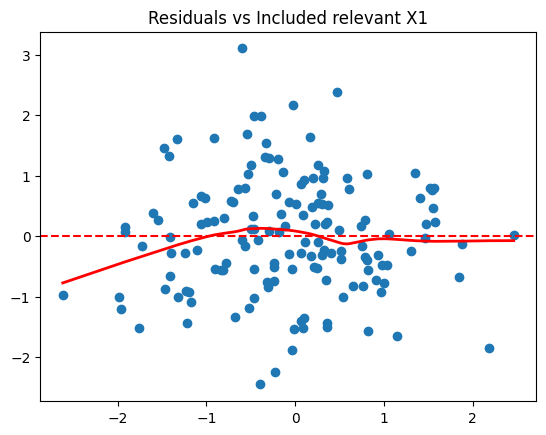

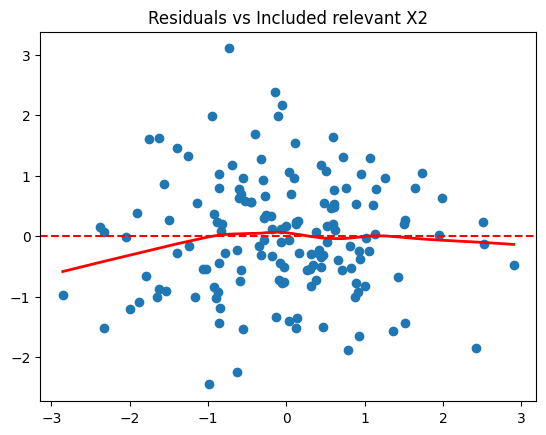

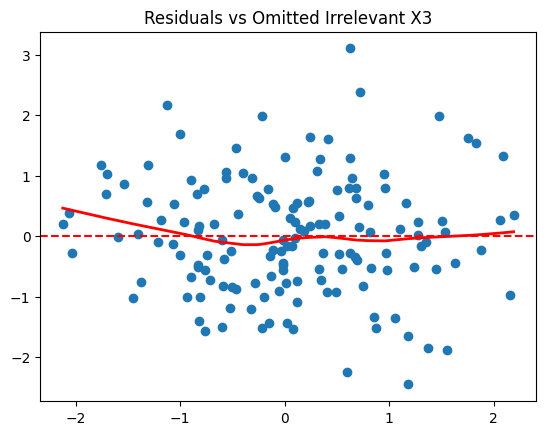

Text(0, 0.5, 'y_hat')

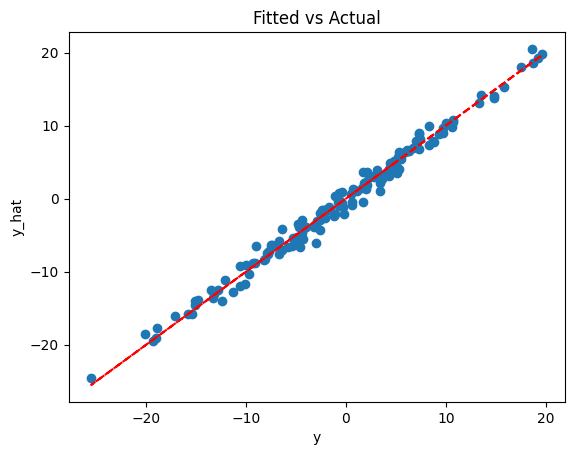

In [ ]:
# Model 3: X1 + X2 (correct)
X12_const = sm.add_constant(df[["X1","X2"]])
model3 = sm.OLS(y, X12_const).fit()
res3 = y - model3.predict(X12_const)
yhat3 = model3.predict(X12_const)

# Residuals vs X1 (will show ~0 correlation)
print("Correlation with X1:", np.corrcoef(X1, res3)[0,1])
# Residuals vs X2 (shows the problem)
print("Correlation with omitted X2:", np.corrcoef(X2, res3)[0,1])
# Residuals vs X3 (shows the problem)
print("Correlation with omitted X3:", np.corrcoef(X3, res3)[0,1])

plt.scatter(X1, res3)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res3, X1)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X1")
plt.show()

plt.scatter(X2, res3)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res3, X2)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X2")
plt.show()

plt.scatter(X3, res3)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res3, X3)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Omitted Irrelevant X3")
plt.show()

plt.scatter(y, yhat3)
plt.plot(y, y, color="red", linestyle="--")
plt.title("Fitted vs Actual")
plt.xlabel("y"); plt.ylabel("y_hat")

Correlation with X1: -8.83613665342122e-15
Correlation with omitted X2: -8.831453343771942e-15
Correlation with omitted X3: 9.695110387265462e-16


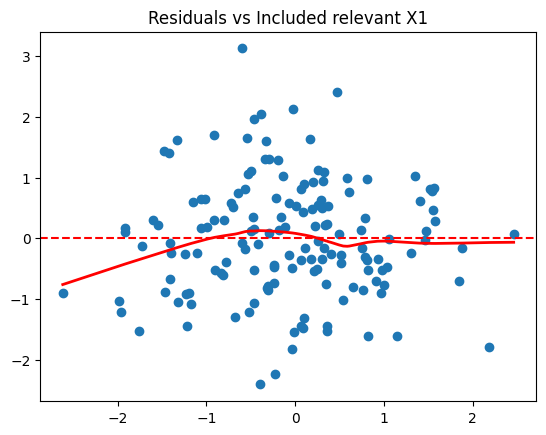

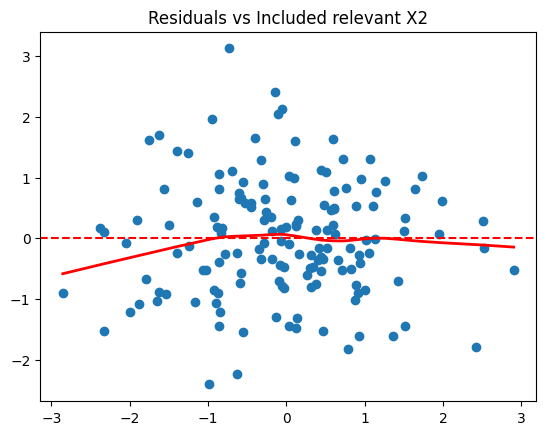

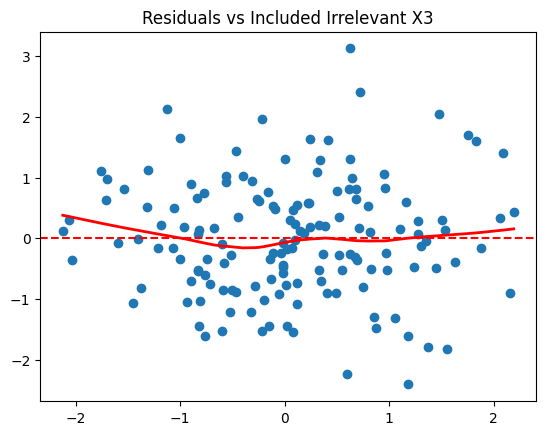

Text(0, 0.5, 'y_hat')

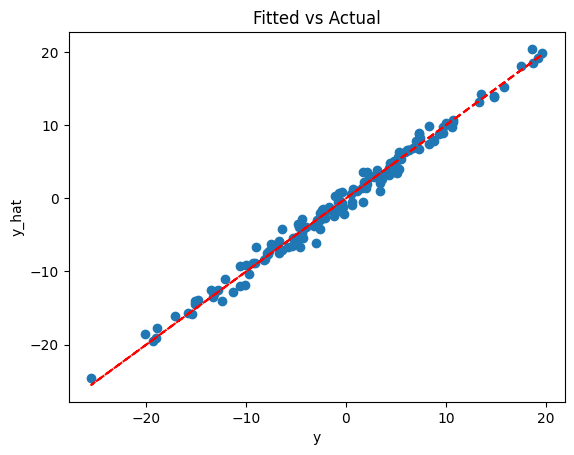

In [ ]:
# Model 4: X1 + X2 + X3 (irrelevant)
X123_const = sm.add_constant(df[["X1","X2","X3"]])
model4 = sm.OLS(y, X123_const).fit()
res4 = y - model4.predict(X123_const)
yhat4 = model4.predict(X123_const)

# Residuals vs X1 (will show ~0 correlation)
print("Correlation with X1:", np.corrcoef(X1, res4)[0,1])
# Residuals vs X2 (shows the problem)
print("Correlation with omitted X2:", np.corrcoef(X2, res4)[0,1])
# Residuals vs X3 (shows the problem)
print("Correlation with omitted X3:", np.corrcoef(X3, res4)[0,1])

plt.scatter(X1, res4)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res4, X1)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X1")
plt.show()

plt.scatter(X2, res4)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res4, X2)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included relevant X2")
plt.show()

plt.scatter(X3, res4)
# Add a trend line to see this clearly
trend_line = sm.nonparametric.lowess(res4, X3)
plt.plot(trend_line[:,0], trend_line[:,1], color="red", linewidth=2)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Included Irrelevant X3")
plt.show()

plt.scatter(y, yhat4)
plt.plot(y, y, color="red", linestyle="--")
plt.title("Fitted vs Actual")
plt.xlabel("y"); plt.ylabel("y_hat")

# 4: Homoscedasticity
The variance of the residuals (errors) should be constant across all fitted values or predictor values.

EXAMPLE of RESPECTED Homoscedasticity
* → scatter looks like a random cloud, same width everywhere.

In [ ]:
# Generate some synthetic data
np.random.seed(0)
n = 100
X = np.linspace(0,10,n)
y = 3 + 2*X + np.random.normal(0,1,n)  # noise with constant variance

In [ ]:
# Fit linear regression model
X_mat = sm.add_constant(X)
model = sm.OLS(y, X_mat).fit()
residuals = model.resid
y_pred = model.fittedvalues

In [ ]:
plt.scatter(y_pred, residuals)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity respected")
plt.show()

EXAMPLE of VIOLATED Homoscedasticity
* → "fan shape" or "cone shape" (variance increases/decreases)

In [ ]:
# Generate some synthetic data
errors = np.random.normal(0, 0.2*X, n)  # variance increases with X
y_hetero = 3 + 2*X + errors

In [ ]:
# Fit linear regression model
model_hetero = sm.OLS(y_hetero, X_mat).fit()
residuals_hetero = model_hetero.resid
y_pred_hetero = model_hetero.fittedvalues

In [ ]:
plt.scatter(y_pred_hetero, residuals_hetero)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Homoscedasticity violated (fan shape)")
plt.show()

# 5: Normality of errors
The residuals (errors) should follow a normal distribution:

EXAMPLE of NORMALITY

In [2]:
# Generate some synthetic data
np.random.seed(42)
n = 100
X1 = np.linspace(0, 10, n)
#X2 = X1 * 0.8 + np.random.normal(0, 1, n)  # correlated with X1 (for multicollinearity example)
y = 3 + 2*X1 + np.random.normal(0, 2, n)   # linear with noise

# Put in dataframe
df = pd.DataFrame({"X1": X1, "y": y})

In [6]:
# Fit linear regression model
X = sm.add_constant(df[["X1"]])
model = sm.OLS(df["y"], X).fit()

In [4]:
#Get the predicted Y hat and the residuals
df["y_pred"] = model.predict(X)
df["residuals"] = df["y"] - df["y_pred"]

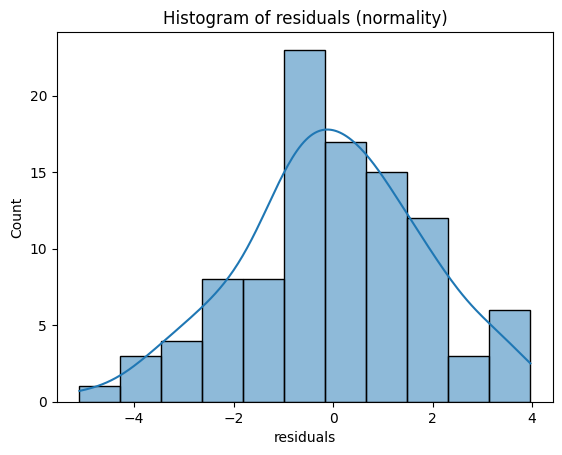

In [5]:
sns.histplot(df["residuals"], kde=True)
plt.title("Histogram of residuals (normality)")
plt.show()

EXAMPLE of VIOLATED NORMALITY

In [7]:
# Generate some synthetic non linear data
np.random.seed(0)
n = 100
X1 = np.linspace(0,10,n)
y_nonlin = 3 + 2*X1**2 + np.random.normal(0,5,100)
df2 = pd.DataFrame({"X1": X1, "y_nonlin": y_nonlin})

In [8]:
# Fit linear regression model
X = sm.add_constant(df2[["X1"]])
model = sm.OLS(df2["y_nonlin"], X).fit()

In [9]:
#Get the predicted Y hat and the residuals
df2["y_pred"] = model.predict(X)
df2["residuals"] = df2["y_nonlin"] - df2["y_pred"]

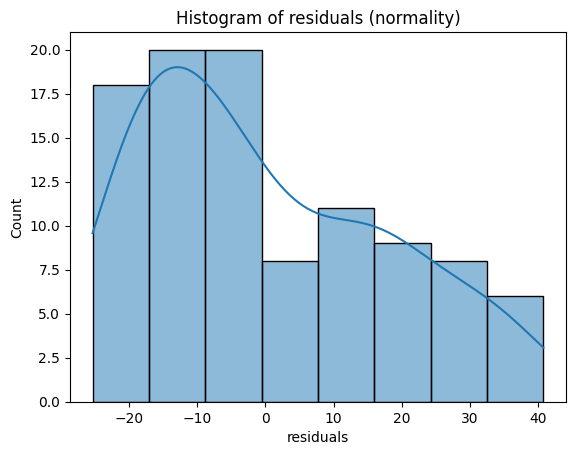

In [10]:
sns.histplot(df2["residuals"], kde=True)
plt.title("Histogram of residuals")
plt.show()